In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('scrapy/output.csv')
data['amount'] = data['amount'].apply(pd.to_numeric, errors='ignore')
data.head(10)

,company,date,exercice,concept,amount,price
0,abengoa_(b),17/04/2015,2014.0,Unico,0.1130,"0,0104"
1,abengoa_(b),09/04/2014,2013.0,Unico,0.1110,"0,0104"
2,abengoa_(b),09/04/2013,2012.0,Unico,0.0720,"0,0104"
3,cleop,23/06/2008,2007.0,Unico,0.0854,"1,1500"
4,cleop,15/06/2007,2006.0,Unico,0.0732,"1,1500"
5,cleop,15/06/2006,2005.0,Unico,0.1647,"1,1500"
6,cleop,15/06/2005,2004.0,Unico,0.1412,"1,1500"
7,cleop,15/06/2004,2003.0,Unico,0.0941,"1,1500"
8,cleop,01/06/2003,2002.0,Unico,0.0824,"1,1500"
9,codere,NaN,NaN,NaN,0.0000,"3,0250"


In [16]:
data_company = data.loc[data['company'] == 'acs']
data_company.head(10)

,company,date,exercice,concept,amount,price
2369,acs,10/07/2019,2019.0,A Cuenta,1.450,"34,6400"
2370,acs,10/07/2019,2019.0,A Cuenta,1.450,"34,6400"
2371,acs,07/02/2019,2018.0,Complementario,0.450,"34,6400"
2372,acs,10/07/2018,2017.0,A Cuenta,0.936,"34,6400"
2373,acs,07/02/2018,2016.0,A Cuenta,0.449,"34,6400"
2374,acs,13/07/2017,2016.0,A Cuenta,0.751,"34,6400"
2375,acs,07/02/2017,2015.0,A Cuenta,0.445,"34,6400"
2376,acs,14/07/2016,2015.0,A Cuenta,0.707,"34,6400"
2377,acs,15/01/2016,2014.0,A Cuenta,0.444,"34,6400"
2378,acs,02/07/2015,2014.0,A Cuenta,0.703,"34,6400"


In [20]:
dividends_per_year = pd.pivot_table(data_company, index=['company', 'exercice'], columns='concept', aggfunc=np.sum, values='amount')
dividends_per_year['Total'] = dividends_per_year.sum(axis=1)
dividends_per_year

concept           A Cuenta  Complementario  Unico   Total
company exercice                                         
acs     1999.0         NaN             NaN  65.00  65.000
        2000.0         NaN             NaN   0.50   0.500
        2001.0         NaN             NaN   0.60   0.600
        2002.0         NaN             NaN   0.72   0.720
        2003.0       0.360           0.460    NaN   0.820
        2004.0       0.140           0.250    NaN   0.390
        2005.0       0.200           0.400    NaN   0.600
        2006.0       0.400           0.850    NaN   1.250
        2007.0       0.750           1.000    NaN   1.750
        2008.0       0.900           1.150    NaN   2.050
        2009.0       0.900           1.150    NaN   2.050
        2010.0       0.900           1.150    NaN   2.050
        2011.0       0.900           1.068    NaN   1.968
        2012.0       1.558             NaN    NaN   1.558
        2013.0       1.157             NaN    NaN   1.157
        2014.0       1.147             NaN    NaN   1.147
        2015.0       1.152             NaN    NaN   1.152
        2016.0       1.200             NaN    NaN   1.200
        2017.0       0.936             NaN    NaN   0.936
        2018.0         NaN           0.450    NaN   0.450
        2019.0       2.900             NaN    NaN   2.900

concept,A Cuenta,Complementario,Unico,Total
count,16.000000,10.000000,4.000000,21.000000
mean,0.968750,0.792800,16.705000,4.297524
std,0.646575,0.362385,32.196792,13.924641
min,0.140000,0.250000,0.500000,0.390000
25%,0.662500,0.452500,0.575000,0.720000
50%,0.900000,0.925000,0.660000,1.157000
75%,1.153250,1.129500,16.790000,1.968000
max,2.900000,1.150000,65.000000,65.000000


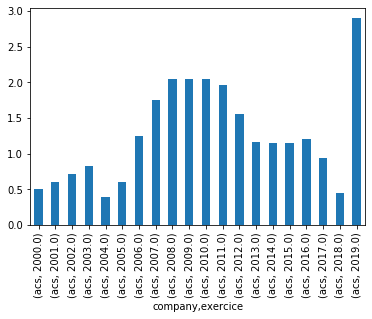

In [54]:
dividends_per_year['Total'].tail(20).plot.bar()
dividends_per_year.describe()

Data about the dividends can be obtained from:

http://www.bolsamadrid.es/esp/aspx/Empresas/OperFinancieras/Dividendos.aspx


Considering exponential growth:
$$
a_n = a_0(1+d/p)^n,
$$
Where:
* _d_ the dividends per year,
* _p_ price of the stocks when they were bought,
* _n_ number of years,

The time to double the initial investment
$$
2 a_0 = a_0(1+d/p)^n \\
2 = (1+d/p)^n \\
\boxed{p = \frac{d}{2^{1/n} - 1}} \\
\boxed{n = \frac{\ln 2}{\ln \left(1 + d/p \right)}}
$$

In our case with a p = 6.3 and d = 0.4, investors are hoping to double their money in n years:

In [36]:
d = 
p = 5.3
n = np.log(2)/np.log(d/p + 1)
print(str(n) + ' years')
print("{0:.2f}% yearly profitability".format(d/p*100))

9.526571358362691 years
7.55% yearly profitability


In [67]:
#Expected price for a given dividend:
d = 0.60
n = 7 # years to doulbe the initial investment

p = d/(2**(1/n)-1)
print(p)

5.7642694141144135
